Defining Business Questions

1. Produk apa yang memiliki penjualan tertinggi dan seberapa besar profit yang dihasilkan dari masing-masing kategori produk?
2. Apa tingkat kepuasan pelanggan terhadap layanan yang diberikan dan faktor-faktor apa yang paling memengaruhi kepuasan tersebut?
3. Lokasi geografis mana yang memiliki jumlah pelanggan terbanyak?

Gathering Data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca dataset
customers = pd.read_csv('data/customers_dataset.csv')
geolocation = pd.read_csv('data/geolocation_dataset.csv')
order_items = pd.read_csv('data/order_items_dataset.csv')
order_payments = pd.read_csv('data/order_payments_dataset.csv')
order_reviews = pd.read_csv('data/order_reviews_dataset.csv')
orders = pd.read_csv('data/orders_dataset.csv')
products = pd.read_csv('data/products_dataset.csv')
sellers = pd.read_csv('data/sellers_dataset.csv')

In [4]:
print(customers.info())
print(geolocation.info())
print(order_items.info())
print(order_payments.info())
print(order_reviews.info())
print(orders.info())
print(products.info())
print(sellers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-n

In [5]:
# Memeriksa missing values
print(customers.isnull().sum())
print(geolocation.isnull().sum())
print(order_items.isnull().sum())
print(order_payments.isnull().sum())
print(order_reviews.isnull().sum())
print(orders.isnull().sum())
print(products.isnull().sum())
print(sellers.isnull().sum())

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64
order_id                            0
customer_id                         0
order_st

pertanyaan 1

In [6]:
# Menggabungkan dataset untuk analisis
merged_data = orders.merge(order_items, on='order_id').merge(products, on='product_id')
merged_data = merged_data.merge(customers, on='customer_id').merge(geolocation, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')

# Menghitung jumlah penjualan per kategori produk dan provinsi
sales_by_category = merged_data.groupby(['geolocation_state', 'product_category_name']).size().reset_index(name='total_sales')

# Mendapatkan kategori produk terlaris di setiap provinsi
top_categories = sales_by_category.loc[sales_by_category.groupby('geolocation_state')['total_sales'].idxmax()]

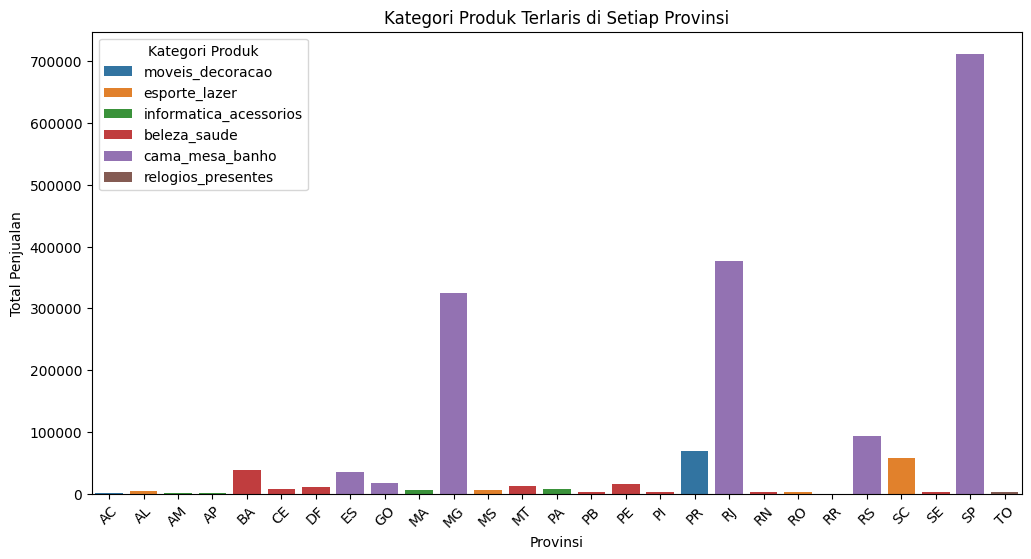

In [7]:
# Visualisasi Kategori Produk Terlaris di Setiap Provinsi
plt.figure(figsize=(12, 6))
sns.barplot(data=top_categories, x='geolocation_state', y='total_sales', hue='product_category_name')
plt.title('Kategori Produk Terlaris di Setiap Provinsi')
plt.xticks(rotation=45)
plt.xlabel('Provinsi')
plt.ylabel('Total Penjualan')
plt.legend(title='Kategori Produk')
plt.show()

pertanyaan 2

In [8]:
# Menggabungkan data ulasan dan metode pembayaran
payment_reviews = orders.merge(order_reviews, on='order_id').merge(order_payments, on='order_id')

# Menghitung rata-rata skor ulasan berdasarkan metode pembayaran
avg_review_scores = payment_reviews.groupby('payment_type')['review_score'].mean().reset_index()

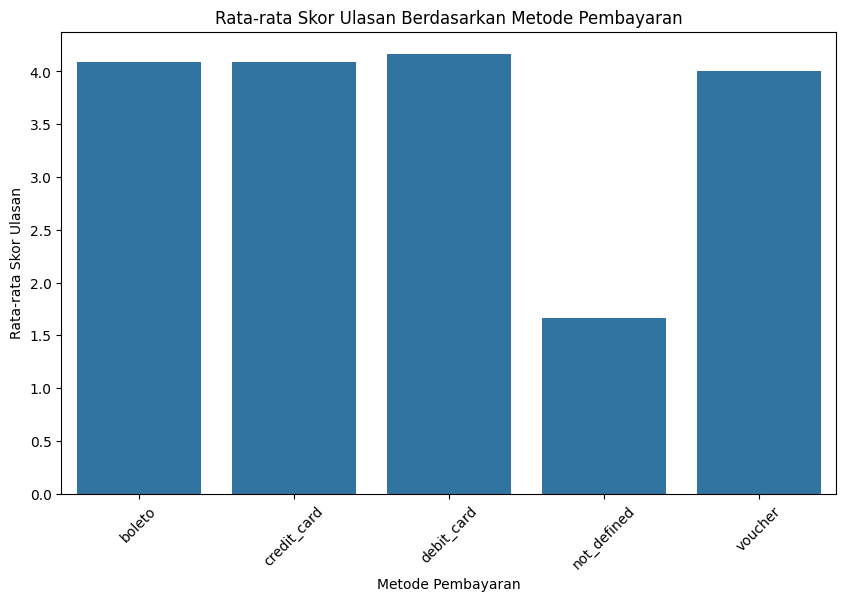

In [9]:
# Visualisasi Rata-rata Skor Ulasan Berdasarkan Metode Pembayaran
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_review_scores, x='payment_type', y='review_score')
plt.title('Rata-rata Skor Ulasan Berdasarkan Metode Pembayaran')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Rata-rata Skor Ulasan')
plt.xticks(rotation=45)
plt.show()

pertanyaan 3

In [11]:
# Mengubah kolom tanggal menjadi datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['month'] = orders['order_purchase_timestamp'].dt.to_period('M')

# Menghitung total penjualan per bulan
monthly_sales = orders.groupby('month')['order_id'].count().reset_index(name='total_sales')

TypeError: Invalid object type at position 0

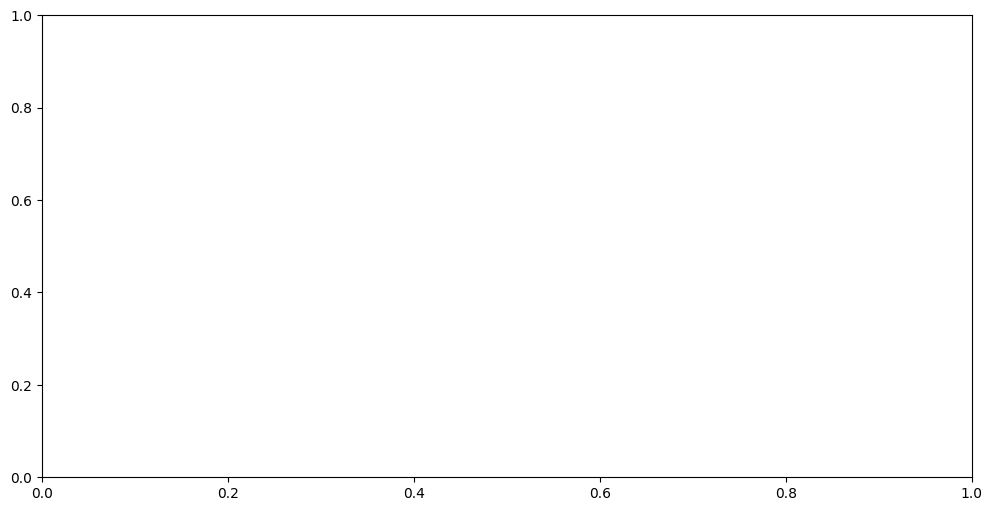

In [12]:
# Visualisasi Tren Penjualan Produk per Bulan
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='month', y='total_sales', marker='o')
plt.title('Tren Penjualan Produk per Bulan di 2023')
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45)
plt.show()

data visualization